In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/covid_india.csv')

In [3]:
df.head()

,state,confirmed,deaths,recovered,Lat,Long
0,Maharashtra,1574,110,188,19.7515,75.7139
1,Tamil Nadu,911,9,44,11.1271,78.6569
2,Delhi,903,14,27,28.7041,77.1025
3,Telangana,487,12,45,18.1124,79.0193
4,Rajasthan,579,3,60,27.0238,74.2179


In [4]:
df['active'] = df['confirmed'] - df['recovered'] - df['deaths']

In [5]:
df.head()

,state,confirmed,deaths,recovered,Lat,Long,active
0,Maharashtra,1574,110,188,19.7515,75.7139,1276
1,Tamil Nadu,911,9,44,11.1271,78.6569,858
2,Delhi,903,14,27,28.7041,77.1025,862
3,Telangana,487,12,45,18.1124,79.0193,430
4,Rajasthan,579,3,60,27.0238,74.2179,516


In [7]:
print("Total no. of active cases in India is "+ str(df['active'].sum()))

Total no. of active cases in India is 6649


In [11]:
tot_cases = df.groupby("state")['active'].sum().sort_values(ascending=False).to_frame()

In [12]:
tot_cases.head()

,active
state,
Maharashtra,1276
Delhi,862
Tamil Nadu,858
Rajasthan,516
Telangana,430


In [24]:
tot_cases.style.background_gradient(cmap='Blues')

,active
state,
Maharashtra,1276
Delhi,862
Tamil Nadu,858
Rajasthan,516
Telangana,430
Uttar Pradesh,397
Madhya Pradesh,390
Gujarat,380
Andhra Pradesh,365


### Total Cases vs Recovered Cases

In [25]:
df.head()

,state,confirmed,deaths,recovered,Lat,Long,active
0,Maharashtra,1574,110,188,19.7515,75.7139,1276
1,Tamil Nadu,911,9,44,11.1271,78.6569,858
2,Delhi,903,14,27,28.7041,77.1025,862
3,Telangana,487,12,45,18.1124,79.0193,430
4,Rajasthan,579,3,60,27.0238,74.2179,516


In [28]:
data = df[['state','confirmed','recovered','deaths','active']]

In [29]:
data.head()

,state,confirmed,recovered,deaths,active
0,Maharashtra,1574,188,110,1276
1,Tamil Nadu,911,44,9,858
2,Delhi,903,27,14,862
3,Telangana,487,45,12,430
4,Rajasthan,579,60,3,516


In [31]:
data.sort_values("confirmed",ascending=False,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [32]:
data

,state,confirmed,recovered,deaths,active
0,Maharashtra,1574,188,110,1276
1,Tamil Nadu,911,44,9,858
2,Delhi,903,27,14,862
4,Rajasthan,579,60,3,516
3,Telangana,487,45,12,430
8,Madhya Pradesh,451,25,36,390
6,Uttar Pradesh,433,32,4,397
10,Gujarat,432,33,19,380
7,Andhra Pradesh,381,10,6,365
5,Kerala,364,124,2,238


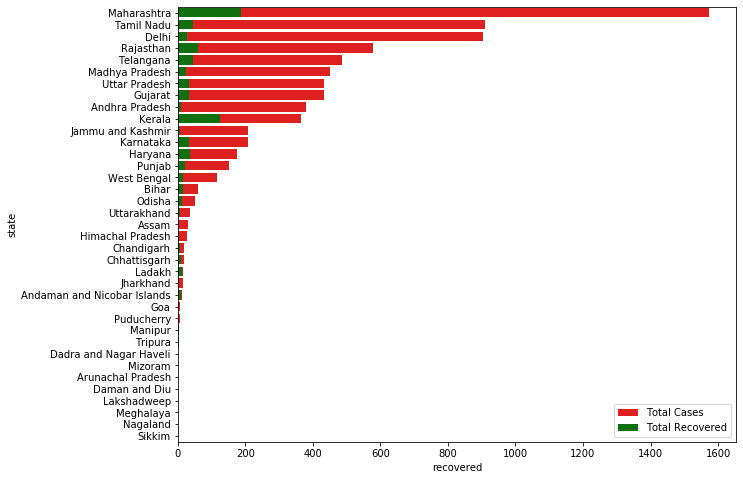

In [34]:
plt.figure(figsize=(10,8))
sns.barplot(x='confirmed',y='state',data=data,label="Total Cases",color='r')
sns.barplot(x='recovered',y='state',data=data,label="Total Recovered",color='g')
plt.legend(loc=4)
plt.show()